## 1. Import and Install Dependencies


In [8]:
%pip install scikit-learn 



Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           2.3.1
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
ale-py                            0.11.2
altair                            5.5.0
anaconda-anon-usage               0.7.1
anaconda-auth                     0.8.6
anaconda-catalogs                 0.2.0
anaconda-cli-base                 0.5.2
anaconda-client                   1.13.0
anaconda-navigator                2.6.6
anaconda-project                  0.11.1
annotated-doc                     0.0.4
annotated-types                   0.6.0
anyio                             4.7.0
appdirs                           1.4.4
APScheduler                       3.11.1
archspec                          0.2.3
argon2-cffi     

In [10]:
import cv2
import numpy as np
import os 
from matplotlib import pyplot as plt
import time
import mediapipe as mp


## 2. Keypoints using MP Holistic

In [11]:
# holistic model
mp_holistic = mp.solutions.holistic
# drawing utilities
mp_drawing = mp.solutions.drawing_utils

In [12]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion BGR to RGB
    image.flags.writeable = False # image no longer writeable
    results = model.process(image) # make prediction
    image.flags.writeable = True # image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color conversion RGB to BGR
    return image, results

In [13]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [14]:
def draw_style_landmarks(image, results):
    # draw face connection
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    # draw pose connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    # draw left hand connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,   
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    # draw right hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [15]:
cap = cv2.VideoCapture(0)
# set mediapiple model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read feed
        ret, frame = cap.read()
    
        # make detection 
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # draw landmarks
        draw_style_landmarks(image, results)
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        # stop capture
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
            
        
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [16]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [17]:
frame

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [172, 177, 162],
        [169, 178, 161],
        [169, 178, 161]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [173, 177, 163],
        [173, 177, 163],
        [173, 177, 163]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [173, 177, 163],
        [173, 177, 163],
        [173, 177, 163]],

       ...,

       [[107,  91,  79],
        [108,  91,  79],
        [109,  91,  79],
        ...,
        [ 16,  12,  15],
        [ 15,  12,  15],
        [ 16,  13,  16]],

       [[109,  91,  79],
        [109,  91,  80],
        [108,  89,  80],
        ...,
        [ 17,  12,  15],
        [ 17,  12,  15],
        [ 17,  12,  15]],

       [[109,  90,  81],
        [109,  90,  81],
        [108,  89,  80],
        ...,
        [ 18,  13,  16],
        [ 17,  12,  15],
        [ 17,  12,  15]]

In [18]:
draw_landmarks(frame, results)

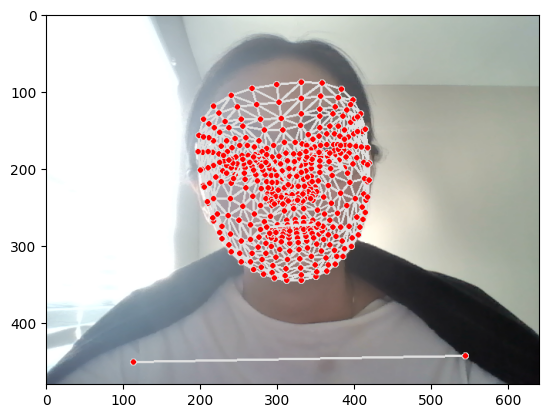

In [19]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3. Extract Keypoints Value

In [20]:
len(results.left_hand_landmarks.landmark)*3

AttributeError: 'NoneType' object has no attribute 'landmark'

In [21]:
pose= []
for res in results.pose_landmarks.landmark:
    test= np.array([res.x, res.y, res.z , res.visibility])
    pose.append(test)

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [ ]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [ ]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [ ]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test= extract_keypoints(results)

In [ ]:
result_test

In [ ]:
468*3 + 33*4 + 21*3 +21*3

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

## 4. Set Up Folders for Collections

In [55]:
# path for exported data , numpy arrays
DATA_PATH = os.path.join('MP_Data')
# actions that we are trying to detect
actions = np.array(['hello','thanks','iloveyou'])
# 30 videos worth of data 
no_sequences = 30
# videos are going to be 30 frames in length
sequence_length = 30

In [56]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action, str(sequence)))
        except:
            pass

## 5. Collect Keypoint Values for Training and Testing

In [57]:
cap = cv2.VideoCapture(0)
# set mediapiple model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # loop through actions
    for action in actions:
        # NEW loop through seuqence/video
        for sequence in range(no_sequences):
            # NEW loop through video length/ sequence length
            for frame_num in range(sequence_length):
                        
                # read feed
                ret, frame = cap.read()
            
                # make detection 
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                # draw landmarks
                draw_style_landmarks(image, results)

                # NEW apply wait logic 
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),4 , cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                # NEW export keypoints
                keypoints= extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                # show to screen
                cv2.imshow('OpenCV Feed', image)
                # stop capture
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
            
        
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
                  
    cap.release()
    cv2.destroyAllWindows()
            

## 6. Preprocess Data and Create Labels and Features

In [58]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [59]:
label_map = {label:num for num, label in enumerate(actions)}

In [60]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [61]:
sequences, labels =[], []
for action in actions:
    for sequence in range(no_sequences):
        window =[]
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [62]:
np.array(sequences).shape

(90, 30, 1662)

In [63]:
np.array(labels).shape

(90,)

In [64]:
X = np.array(sequences)

In [65]:
X.shape

(90, 30, 1662)

In [66]:
y = to_categorical(labels).astype(int)

In [67]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [68]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.05)


In [69]:
X_train.shape

(85, 30, 1662)

## 7. Build and Train LSTM Neural Network

In [70]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [71]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [72]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences= True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [73]:
actions.shape[0]

3

In [74]:
model.compile(optimizer ='Adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])

In [75]:
model.fit(X_train, y_train, epochs = 2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 10s 128ms/step - loss: 1.1062 - categorical_accuracy: 0.3059
Epoch 2/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.3304 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.1062 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.1293 - categorical_accuracy: 0.3529
Epoch 5/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.0842 - categorical_accuracy: 0.4235
Epoch 6/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.5304 - categorical_accuracy: 0.3765
Epoch 7/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0947 - categorical_accuracy: 0.3176
Epoch 8/2000
3/3 [==============================] - 1s 160ms/step - loss: 1.0832 - categorical_accuracy: 0.3765
Epoch 9/2000
3/3 [==============================] - 1s 289ms/step - loss: 1.0417 - categorical_accuracy

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

## 8. Make Preductions

In [77]:
res= model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [78]:
actions[np.argmax(res[4])]

'thanks'

In [79]:
actions[np.argmax(y_test[4])]

'thanks'

## 9. Save Weights

In [80]:
model.save('action.h5')

C:\Users\User\anaconda3\envs\action_detection\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 10. Evaluation using Confusion Matrix and Accuracy

In [81]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [82]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 26ms/step


In [83]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat= np.argmax(yhat, axis=1).tolist()

In [84]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  0],
        [ 0, 29]],

       [[58,  0],
        [ 0, 27]],

       [[56,  0],
        [ 0, 29]]], dtype=int64)

In [85]:
accuracy_score(ytrue, yhat)

1.0

## 11. Test in Real time

In [86]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [88]:
# 1. new detection variables
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# set mediapiple model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read feed
        ret, frame = cap.read()
    
        # make detection 
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # draw landmarks
        draw_style_landmarks(image, results)

        # 2. make predictions
        keypoints= extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])



        # 3. visualization logic
            if res[np.argmax(res)]> threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
    
            if len(sentence) >5:
                sentence = sentence[-5:]
            image = prob_viz(res, actions, image, colors)
     
            
                
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        # stop capture
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
            
        
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti